# LARRY Dataset

Preprocessing and dimension reduction of the full dataset

In [1]:
%load_ext nb_black

import scdiffeq as sdq

h5ad_path = "../KleinLabData/in_vitro/adata.Weinreb2020.in_vitro.gene_filtered.h5ad"

adata = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 25289
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated'
    var: 'gene_ids', 'hv_genes', 'use_genes'
    uns: 'fate_counts', 'time_occupance'
    obsm: 'X_clone', 'cell_fate_df'


<IPython.core.display.Javascript object>

In [2]:
adata = adata[:, adata.var["use_genes"]].copy()
adata

AnnData object with n_obs × n_vars = 130887 × 2447
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated'
    var: 'gene_ids', 'hv_genes', 'use_genes'
    uns: 'fate_counts', 'time_occupance'
    obsm: 'X_clone', 'cell_fate_df'

<IPython.core.display.Javascript object>

In [3]:
reducer = sdq.tl.DimensionReduction(
    adata, save_path="./LARRY_full_dataset.reducer_models"
)

 - [INFO] | mkdir: ./LARRY_full_dataset.reducer_models


<IPython.core.display.Javascript object>

In [4]:
reducer.fit_scaler()

 - [INFO] | Configuring: SCALER model
 - [INFO] | PATH: ./LARRY_full_dataset.reducer_models/scaler_model.pkl DOES NOT EXIST.
 - [INFO] | Fitting SCALER model
 - [INFO] | Saving SCALER model to: ./LARRY_full_dataset.reducer_models/scaler_model.pkl


<IPython.core.display.Javascript object>

In [5]:
reducer.fit_pca()

 - [INFO] | Configuring: PCA model
 - [INFO] | PATH: ./LARRY_full_dataset.reducer_models/pca_model.pkl DOES NOT EXIST.
 - [INFO] | Fitting PCA model
 - [INFO] | Saving PCA model to: ./LARRY_full_dataset.reducer_models/pca_model.pkl


<IPython.core.display.Javascript object>

In [6]:
reducer.fit_umap()

 - [INFO] | Configuring: UMAP model
 - [INFO] | PATH: ./LARRY_full_dataset.reducer_models/umap_model.pkl DOES NOT EXIST.
 - [INFO] | Fitting UMAP model
 - [INFO] | Saving UMAP model to: ./LARRY_full_dataset.reducer_models/umap_model.pkl


<IPython.core.display.Javascript object>

In [7]:
adata

AnnData object with n_obs × n_vars = 130887 × 2447
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_genes', 'use_genes'
    uns: 'fate_counts', 'time_occupance'
    obsm: 'X_clone', 'cell_fate_df', 'X_pca', 'X_umap'
    layers: 'X_scaled'

<IPython.core.display.Javascript object>

### Plot

In [10]:
import matplotlib.pyplot as plt
import scdiffeq_plots as sdq_pl
import larry

cmap = larry.pl.in_vitro_cmap()
df = adata.obs.copy()

<IPython.core.display.Javascript object>

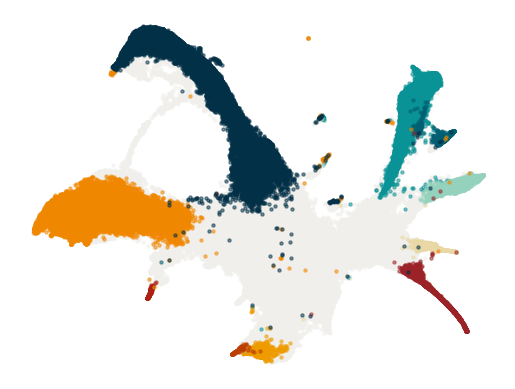

<IPython.core.display.Javascript object>

In [23]:
fig, axes = sdq_pl.plot(delete_spines=["all"], rm_ticks=True)
for en, (group, group_df) in enumerate(df.groupby("Cell type annotation")):
    X_umap = adata[group_df.index].obsm["X_umap"]
    c = cmap.loc[cmap["Cell type annotation"] == group]["color"]
    if group in ["undiff", "Undifferentiated"]:
        z = 0
    else:
        z = en + 2
    axes[0].scatter(X_umap[:, 0], X_umap[:, 1], s=5, alpha=0.5, c=c, zorder=z)